# Problema das Garrafas

O Problema de Otimização da Fabricação de Garrafas Plásticas é um simples "problema brinquedo" que será utilizado para introduzir, na prática, a aplicação de Algoritmos Genéticos em problemas de otimização.

Para mais detalhes, a apresentação do problema se encontra [aqui](garrafas2020.pdf). A solução é apresentada neste [documento](garrafas2020-solucao.pdf).

In [1]:
import numpy as np
import random

import inspyred
from inspyred import ec
from inspyred.ec import terminators, selectors, observers

A representação do cromossomo escolhida foi binária, e a inicialização da população ocorre de maneira aleatória.

In [2]:
# Generates random individuals
def generate_binary(random, args):
    num_genes = args.get('num_genes')
    bits = args.get('num_bits')
    
    return np.array([np.random.choice([0, 1]) for i in range(num_genes * bits)])

Aqui temos a função de avaliação da população, onde a função de fitness (lucro) é calculada e as penalidades, conforme as restrições do problema, são devidamente aplicadas.

In [3]:
# Evaluates the entire population
def evaluate_binary(candidates, args):
    num_genes = args.get('num_genes')
    bits = args.get('num_bits')
    fitness = []
    
    # Calculate fitness for every individual and append it to the list
    for curr in candidates:
        # Get integer representation of genes for easier calculations
        genes_int = integer_rep(curr, num_genes)
        
        # Calculate fitness function
        fit = (5 * genes_int[0]) + (4.5 * genes_int[1])
        fit = fit / 6650
        
        # Apply penalties and append result to list
        fitness.append(fit - penalty(genes_int))
    
    return fitness

Penalidades citadas anteriormente. Essas penalidades dizem respeito à:
 - Tempo de ocupação da extrusora (máximo de 60h semanais)
 - Ocupação do depósito (máximo de 14000 unidades de volume)
 - Demanda de garrafas de leite e suco (máximo de 700 garrafas de cada tipo por semana)

In [4]:
# Calculates fitness penalties
def penalty(genes_int):
    h1 = max(0, (6 * genes_int[0] + 5 * genes_int[1])/100 - 60) / 60
    h2 = max(0, (10 * genes_int[0]) + (20 * genes_int[1]) - 14000) / 14000
    h3 = max(0, (genes_int[0] - 700)) / 700
    h4 = max(0, (genes_int[1] - 700)) / 700
    
    return (h1 + h2 + h3 + h4) / 2

Função responsável por decodificar a representação binária dos genes, convertendo cada atributo para um valor numérico que pode ser mais facilmente manipulado.

In [5]:
# Returns integer representation of a given individual's genes
def integer_rep(genes, num_genes=2):
    genes = np.array_split(genes, num_genes)
    genes_int = []
    for g in genes:
        genes_int.append(int("".join([str(bit) for bit in g]), 2))
        
    return genes_int

Aqui definimos o Algoritmo Genético propriamente dito, escolhendo seus parâmetros, bem como dos individuos da população.

In [6]:
# Genetic Algorithm declaration and process of evolution
def main():
    rand = random.Random()

    ga = inspyred.ec.GA(rand)
    ga.observer = observers.plot_observer
    ga.terminator = terminators.generation_termination
    ga.selector = selectors.tournament_selection

    final_pop = ga.evolve(generator=generate_binary,
                          evaluator=evaluate_binary,
                          tournament_size=3,
                          max_generations=25,
                          crossover_rate=0.5,
                          mutation_rate=0.01,
                          pop_size=300,
                          num_genes=2,
                          num_bits=10)

    return max(final_pop)

Dá-se início ao processo de evolução, imprimindo o gráfico de fitness por avaliações ao final da execução. O número da geração se dá por:

$$ \frac{\text{nº de avaliações}}{\text{tamanho da população}} $$

Cada vez que main() for chamado, um resultado diferente poderá ser gerado. O ótimo global (conhecido para este problema) é 700 garrafas de leite e 350 de suco.

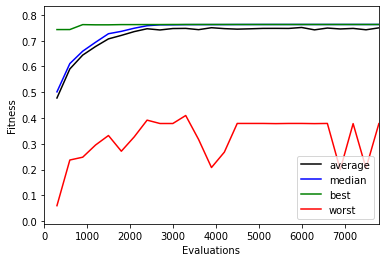

In [7]:
if __name__ == '__main__':
    best = main()
    best_ind = integer_rep(best.candidate)

Percebe-se que, devido à simplicidade do problema, o melhor indíviduo já apareceu no início da evolução. Interpretação dos resultados do melhor indivíduo:

In [8]:
    print(f"Qtd de garrafas de leite: {best_ind[0]}")
    print(f"Qtd de garrafas de suco: {best_ind[1]}")
    print(f"Ocupação da extrusora: {(6 * best_ind[0]/100) + (5 * best_ind[1]/100)}h")
    print(f"Ocupação do depósito: {10 * best_ind[0] + 20 * best_ind[1]}")
    print(f"Lucro: {5 * best_ind[0] + 4.5 * best_ind[1]}")

Qtd de garrafas de leite: 700
Qtd de garrafas de suco: 350
Ocupação da extrusora: 59.5h
Ocupação do depósito: 14000
Lucro: 5075.0
